In [206]:

import numpy as np
import pydicom as dcm
import cv2

from Slice_Selection.slice_selection import *

In [48]:

def calculate_dice_score_3d(volume1, volume2):
    assert volume1.shape == volume2.shape, "Volumes must have the same shape"

    intersection = np.logical_and(volume1, volume2).sum()
    union = volume1.sum() + volume2.sum()

    dice_score = 2 * intersection / union

    return dice_score

# # Example usage with 3D volumes
# volume1 = np.random.randint(0, 2, size=(64, 64, 64))  # Example binary volume
# volume2 = np.random.randint(0, 2, size=(64, 64, 64))  # Example binary volume

# dice_score_3d = calculate_dice_score_3d(volume1, volume2)
# print(f"Dice score (3D): {dice_score_3d:.4f}")

In [3]:
def xyz_to_image_coords(X,Y,Z,spacing,origin):
    X_new, Y_new, Z_new = [], [], []
    for x,y,z in zip(X,Y,Z):
        X_new.append((x-origin[0])/spacing[0])
        Y_new.append((y-origin[1])/spacing[1])
        Z_new.append((z-origin[2])/spacing[2])
    
    return X_new, Y_new, Z_new

In [87]:
def xyz_to_image_coords_3D(contour,spacing,origin):
    
    image_coords = []
    for slice in contour:
        new_line = []
        for i in range(0,len(slice),3):
            new_line.append((slice[i]-origin[0])/spacing[0])
            new_line.append((slice[i+1]-origin[1])/spacing[1])
            new_line.append((slice[i+2]-origin[2])/spacing[2])
#             print(slice[i+2],origin[2],spacing[2],'=',(slice[i+2]-origin[2])/spacing[2])
        
#         x_indices, y_indices, z_indices = slice[0::3], slice[1::3], slice[2::3]
#         x,y,z = xyz_to_image_coords_contour(x_indices,y_indices,z_indices,spacing,origin)
        image_coords.append(new_line)
        
    return image_coords
        

In [5]:
def convert_contours_to_volume(contours):
    """
    Convert a list of 2D contours to a 3D binary volume.

    Args:
        contours (list of np.ndarray): List of binary masks (contours).

    Returns:
        np.ndarray: 3D binary volume.
    """
    # Determine the dimensions of the 3D volume
    num_slices, height, width = len(contours), contours[0].shape[0], contours[0].shape[1]

    # Initialize an empty 3D volume
    volume = np.zeros((num_slices, height, width), dtype=np.uint8)

    # Stack the 2D contours to create the 3D volume
    for i, contour in enumerate(contours):
        volume[i, :, :] = contour

    return volume


In [7]:
# PATH = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/' 
# patient = '22'
# CT = '20180921_CT_13_SEP_2018'
# CT_dcm = dcm.read_file(PATH+patient+'/'+CT+'/'+[f for f in os.listdir(PATH+patient+'/'+CT) if 'CT' in f][0])
RS_AI_OG = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.27944685974298517235273490150576291706.dcm')
RS_AI_A = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.10226744751331547397587265316063475652.dcm')
RS_743 = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/OG_CT/RS.1.2.246.352.221.54162806448186087767563333417651109794.dcm')

# RS_limb = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/22/RS.1.2.246.352.205.5548404720262746199.8088424948936543396.dcm')
# RS_22 = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/22/20180921_CT_13_SEP_2018/RS.1.2.246.352.221.573469055763021206212901379500416462245.dcm')

In [148]:
#743
PATH = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/' 
# patient = '743'
# CT = '20180921_CT_13_SEP_2018'
ct_path = '/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/Anon_CT/'
CT_dcm = dcm.read_file(ct_path+[f for f in os.listdir(ct_path) if 'CT' in f][0])
RS_AI_OG = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.27944685974298517235273490150576291706.dcm')
RS_AI_A = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/RS.1.2.826.0.1.3680043.8.498.10226744751331547397587265316063475652.dcm')
RS_743 = dcm.read_file('/mnt/iDriveShare/Kayla/CBCT_images/anonymized/TEST_FULL_743/OG_CT/RS.1.2.246.352.221.54162806448186087767563333417651109794.dcm')


In [149]:
RS = RS_743

In [125]:
print("RS",find_ROI_names(RS,'brain'))
print("LimbusAI OG",find_ROI_names(RS_AI_OG,'OpticNrv_R'))
print("LimbusAI AN",find_ROI_names(RS_AI_A,'OpticNrv_R'))

RS ['BRAIN']
LimbusAI OG ['OpticNrv_R']
LimbusAI AN ['OpticNrv_R']


In [180]:
cont_AI_A,zs_AI_A = get_all_ROI_contours(['Eye_L'],RS_AI_A)
cont_AI_OG, zs_AI_OG = get_all_ROI_contours(['Eye_L'],RS_AI_OG)
cont,zs = get_all_ROI_contours(['Globe_L'],RS)

In [207]:
cont_AI_A,zs_AI_A = get_all_ROI_contours(['Brain2'],RS_AI_A)
cont_AI_OG, zs_AI_OG = get_all_ROI_contours(['Brain3'],RS_AI_OG)
cont,zs = get_all_ROI_contours(['BRAIN'],RS)

In [208]:
b_limb = cont_AI_A['Brain2']
b_22 = cont_AI_OG['Brain3']
b = cont['BRAIN']
b_limb = b

In [182]:
# b_limb = cont_AI_A['Brain2']
b_22 = cont_AI_OG['Eye_L']
b = cont['Globe_L']
b_limb = b

In [161]:
b_limb = cont_AI_A['OpticNrv_R']
b_22 = cont_AI_OG['OpticNrv_R']


KeyError: 'OpticNrv_R'

In [209]:
height = max(len(b_22), len(b_limb))
print(height)

57


In [210]:
start_z = min(b_22[0][2], b_limb[0][2])
z_spacing = b_22[0][2]-b_22[1][2]
print(start_z)

-552.5


In [211]:
# for row in img_coords:
#     print(row[2])

In [212]:
origin = CT_dcm.ImagePositionPatient
spacing = [CT_dcm.PixelSpacing[0],CT_dcm.PixelSpacing[1],CT_dcm.SliceThickness]
print(origin,spacing)

[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']


In [213]:
x_indices, y_indices, z_indices = b_22[0::3], b_22[1::3], b_22[2::3]

In [214]:
img_coords_22 = xyz_to_image_coords_3D(b_22,spacing,[origin[0],origin[1],start_z])
img_coords_limb = xyz_to_image_coords_3D(b_limb,spacing,[origin[0],origin[1],start_z])

In [41]:
def get_binary_volume(img_coords, max_z=0,rows=512, cols=512):
    if max_z == 0:
        max_z = max(int(s[2]) for s in img_coords)
        
    volume_shape = (max_z + 1, rows, cols)
    volume_binary = np.zeros(volume_shape, dtype=np.uint8)




    for c_slice in img_coords:
        z = int(c_slice[2])
#         print(z)
        X, Y = c_slice[::3], c_slice[1::3]

        cont_xy = np.array([tuple([int(x),int(y)]) for x,y in zip(X,Y)])
        cont_xy = cont_xy.reshape((-1,1,2))


        for i in range(0,len(volume_binary[0])):
            for j in range(0,len(volume_binary[0][0])):
                result = cv2.pointPolygonTest(cont_xy, (i,j), False) 
                if result == 1:
                    volume_binary[z][j][i] = 1





    return volume_binary




In [102]:
def get_DSC_single(contour_truth, contour_test,spacing,origin):
    height = max(len(contour_truth), len(contour_test))
    print(height)
#     start_z = min(contour_truth[0][2], contour_test[0][2])
#     z_spacing = contour_truth[0][2]-contour_truth[1][2]

    start_z = min(contour_truth[0][2], contour_test[0][2])

    img_coords_truth = xyz_to_image_coords_3D(contour_truth,spacing,[origin[0],origin[1],start_z])
    img_coords_test = xyz_to_image_coords_3D(contour_test,spacing,[origin[0],origin[1],start_z])
    
    max_z = max(max(int(s[2]) for s in img_coords_truth),max(int(s[2]) for s in img_coords_test))
    print(max_z)
    
    binary_truth = get_binary_volume(img_coords_truth,max_z)
    binary_test = get_binary_volume(img_coords_test,max_z)
    
    score = calculate_dice_score_3d(binary_truth, binary_test)
    
    return score

In [193]:
def get_DSC_all(RS_truth, RS_test,CT_dcm):
    names_truth = find_ROI_names(RS_truth)
    names_test = find_ROI_names(RS_test)
    name_truth_not_done = names_truth.copy()
    scores = {}
    
    cont_truth,zs_truth = get_all_ROI_contours(names_truth,RS_truth)
    cont_test,zs_test = get_all_ROI_contours(names_test,RS_test)
    
    origin = CT_dcm.ImagePositionPatient
    spacing = [CT_dcm.PixelSpacing[0],CT_dcm.PixelSpacing[1],CT_dcm.SliceThickness]
    print(origin,spacing)
    
    for name in names_test:
        if name not in names_truth:
            print("WARNING: NO GROUND TRUTH FOR CONTOUR NAMED", name)
            continue
        
        print(name)
            
        try:
            score = get_DSC_single(cont_truth[name],cont_test[name],spacing,origin)
        
            scores[name] = score
            name_truth_not_done.remove(name)
        except Exception as e:
            print(name,"ERROR")
    print("Names in truth not matched:", name_truth_not_done)
    
    return scores


In [192]:
# BRAIN
get_DSC_single(b_22, b_limb,spacing,[origin[0],origin[1],start_z])

9
8


0.9274495138369484

In [105]:
get_DSC_all(RS_AI_OG, RS_AI_A, CT_dcm)

[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']
LN_Neck_IB_L
16
15
LN_Neck_IA
9
8
LN_Neck_2347AB_R
62
61
LN_Neck_2347AB_L
62
61
Lips
20
18
Larynx
12
11
Hippocampus_R
3
2
Hippocampus_L
5
4
Glnd_Thyroid
30
18
Glnd_Submand_R
15
14
Glnd_Submand_L
15
14
Eye_R
9
8
Eye_L
9
8
Esophagus
49
48
Cornea_R
6
5
Cornea_L
7
6
Cochlea_R
1
0


/tmp/ipykernel_1020531/560343969.py:7: RuntimeWarning: invalid value encountered in scalar divide
  dice_score = 2 * intersection / union


Cochlea_L
2
1
Clavicle_R
24
23
Clavicle_L
29
28
Cavity_Oral
18
17
Brainstem
22
21
BrachialPlex_R
35
32
BrachialPlex_L
35
34
Bone_Mandible
48
27
Bone_Hyoid
15
10
LN_Neck_IB_R
16
15
LN_Neck_L
62
61
LN_Neck_R
62
61
LN_Neck_V_L
35
36
LN_Neck_V_R
37
36
LN_Neck_VI
33
32
Lung_L
42
41
Lung_R
42
41
OpticChiasm
4
2
OpticNrv_L
3
2
OpticNrv_R
3
2
Parotid_L
19
18
Parotid_R
19
18
Pharynx
40
39
Pituitary
2
1
SpinalCanal
87
86
SpinalCord~
87
86
Names in truth not matched: ['Brain3', 'Lens_L', 'Lens_R']


{'LN_Neck_IB_L': 1.0,
 'LN_Neck_IA': 1.0,
 'LN_Neck_2347AB_R': 1.0,
 'LN_Neck_2347AB_L': 1.0,
 'Lips': 1.0,
 'Larynx': 1.0,
 'Hippocampus_R': 1.0,
 'Hippocampus_L': 1.0,
 'Glnd_Thyroid': 1.0,
 'Glnd_Submand_R': 1.0,
 'Glnd_Submand_L': 1.0,
 'Eye_R': 0.37189000436490616,
 'Eye_L': 0.4601552921945239,
 'Esophagus': 1.0,
 'Cornea_R': 0.0,
 'Cornea_L': 0.0,
 'Cochlea_R': nan,
 'Cochlea_L': 1.0,
 'Clavicle_R': 1.0,
 'Clavicle_L': 1.0,
 'Cavity_Oral': 1.0,
 'Brainstem': 1.0,
 'BrachialPlex_R': 1.0,
 'BrachialPlex_L': 1.0,
 'Bone_Mandible': 1.0,
 'Bone_Hyoid': 1.0,
 'LN_Neck_IB_R': 1.0,
 'LN_Neck_L': 1.0,
 'LN_Neck_R': 1.0,
 'LN_Neck_V_L': 1.0,
 'LN_Neck_V_R': 1.0,
 'LN_Neck_VI': 1.0,
 'Lung_L': 1.0,
 'Lung_R': 1.0,
 'OpticChiasm': 0.9906542056074766,
 'OpticNrv_L': 0.990990990990991,
 'OpticNrv_R': 0.9512195121951219,
 'Parotid_L': 1.0,
 'Parotid_R': 1.0,
 'Pharynx': 1.0,
 'Pituitary': 1.0,
 'SpinalCanal': 1.0,
 'SpinalCord~': 1.0}

In [195]:
dsc_ais = {'LN_Neck_IB_L': 1.0,
 'LN_Neck_IA': 1.0,
 'LN_Neck_2347AB_R': 1.0,
 'LN_Neck_2347AB_L': 1.0,
 'Lips': 1.0,
 'Larynx': 1.0,
 'Hippocampus_R': 1.0,
 'Hippocampus_L': 1.0,
 'Glnd_Thyroid': 1.0,
 'Glnd_Submand_R': 1.0,
 'Glnd_Submand_L': 1.0,
 'Eye_R': 0.37189000436490616,
 'Eye_L': 0.4601552921945239,
 'Esophagus': 1.0,
 'Cornea_R': 0.0,
 'Cornea_L': 0.0,
 'Cochlea_R': nan,
 'Cochlea_L': 1.0,
 'Clavicle_R': 1.0,
 'Clavicle_L': 1.0,
 'Cavity_Oral': 1.0,
 'Brainstem': 1.0,
 'BrachialPlex_R': 1.0,
 'BrachialPlex_L': 1.0,
 'Bone_Mandible': 1.0,
 'Bone_Hyoid': 1.0,
 'LN_Neck_IB_R': 1.0,
 'LN_Neck_L': 1.0,
 'LN_Neck_R': 1.0,
 'LN_Neck_V_L': 1.0,
 'LN_Neck_V_R': 1.0,
 'LN_Neck_VI': 1.0,
 'Lung_L': 1.0,
 'Lung_R': 1.0,
 'OpticChiasm': 0.9906542056074766,
 'OpticNrv_L': 0.990990990990991,
 'OpticNrv_R': 0.9512195121951219,
 'Parotid_L': 1.0,
 'Parotid_R': 1.0,
 'Pharynx': 1.0,
 'Pituitary': 1.0,
 'SpinalCanal': 1.0,
 'SpinalCord~': 1.0}

NameError: name 'nan' is not defined

In [194]:
dsc_original = get_DSC_all(RS, RS_AI_OG, CT_dcm)

[-310.5, -245.5, -495.5] ['1.21289062', '1.21289062', '3.0']
BrachialPlex_L
35
34
BrachialPlex_R
35
32
Cavity_Oral
24
23
Cochlea_L
3
2
Cochlea_R
3
2
Glnd_Submand_L
15
14
Glnd_Submand_R
15
14
Glnd_Thyroid
33
18
Lens_L
3
2
Lens_R
3
2
Lips
20
18
OpticNrv_L
4
3
OpticNrv_R
3
2
Parotid_L
21
18
Parotid_R
19
18
Pharynx
40
39
Pituitary
2
1
Names in truth not matched: ['BODY', 'Spc_Retrophar_R', 'Spc_Retrophar_L', 'PTV_7000', 'Chiasm', 'Musc_Constrict_S', 'Musc_Constrict_M', 'Musc_Constrict_I', 'Lung~_R', 'Lung~_L', 'Lobe_Temporal_R', 'Lobe_Temporal_L', 'LARYNX_GLOTTIC', 'GTV', 'Globe_R', 'Globe_L', 'Esophagus~^2cm', 'Esophagus_S', 'CTV_7000', 'CTV_5600', 'Carina', 'BRAIN', 'Bones^RadCalc', 'MANDIBLE', 'BRACHIALPLEXS', 'BRSTEM', 'BRSTEM_PRV', 'CONSTRICTOR_MUSC', 'CORD', 'CORD_PRV', 'GTVn', 'GTVp', 'NON-PTV', 'OPTIC', 'PAROTIDS', 'PTV_5600', 'SKIN', 'Cavity_Oral-PTV', 'zDensityOverride', 'CouchSurface', 'CouchInterior', 'Skin_5mm']


In [202]:
dict_names = {
    'Bone_Mandible':'MANDIBLE',
    'Brain3':'BRAIN',
    'Brainstem':'BRSTEM',
    'Esophagus':'Esophagus_S',
    'Eye_L': 'Globe_L',
    'Eye_R': 'Globe_R',
    'Larynx': 'LARYNX_GLOTTIC',
    'Lung_L':'Lung~_L',
    'Lung_R':'Lung~_R',
    'OpticChiasm':'Chiasm',
    'SpinalCord~':'CORD'
    
    
    
}

In [204]:
for key in dict_names:
#     print(entry)
#     if key in dsc_original:
#         continue
    name_og = dict_names[key]
    name_ai = key

    print(name_ai, name_og)
    cont_AI_A,zs_AI_A = get_all_ROI_contours([name_ai],RS_AI_OG)
    cont_AI_OG, zs_AI_OG = get_all_ROI_contours([name_og],RS)
    b_limb = cont_AI_A[name_ai]
    b_22 = cont_AI_OG[name_og]
    start_z = min(b_22[0][2], b_limb[0][2])
    dsc_original[name_ai] = get_DSC_single(b_22, b_limb,spacing,[origin[0],origin[1],start_z])


Bone_Mandible MANDIBLE
52
27
Brain3 BRAIN
57
50
Brainstem BRSTEM
26
24
Esophagus Esophagus_S
49
48
Eye_L Globe_L
9
8
Eye_R Globe_R
9
8
Larynx LARYNX_GLOTTIC
22
21
Lung_L Lung~_L
153
41
Lung_R Lung~_R
180
41
OpticChiasm Chiasm
4
2
SpinalCord~ CORD
87
86


In [205]:
dsc_original

{'BrachialPlex_L': 0.3387096774193548,
 'BrachialPlex_R': 0.37109103544127864,
 'Cavity_Oral': 0.7495161880851509,
 'Cochlea_L': 0.09523809523809523,
 'Cochlea_R': 0.0,
 'Glnd_Submand_L': 0.8850719878757262,
 'Glnd_Submand_R': 0.8389715832205683,
 'Glnd_Thyroid': 0.8368774482372692,
 'Lens_L': 0.8387096774193549,
 'Lens_R': 0.6956521739130435,
 'Lips': 0.38744212962962965,
 'OpticNrv_L': 0.4873096446700508,
 'OpticNrv_R': 0.8117647058823529,
 'Parotid_L': 0.8209739161399449,
 'Parotid_R': 0.8662751516318475,
 'Pharynx': 0.5373825411956966,
 'Pituitary': 0.8288288288288288,
 'Bone_Mandible': 0.8498091949845539,
 'Brainstem': 0.8677281077770974,
 'Esophagus': 0.7702141259188239,
 'Eye_L': 0.9274495138369484,
 'Eye_R': 0.9205083478694244,
 'Larynx': 0.47950819672131145,
 'Lung_L': 0.9847143230574399,
 'Lung_R': 0.9870256723017401,
 'OpticChiasm': 0.38072289156626504,
 'SpinalCord~': 0.6564738996929376,
 'Brain3': 0.9767831512698403}

In [42]:
# volume_binary =  []
# img_copy = img_coords.copy()
# for k in range(0,max([int(s[2]) for s in img_coords])):
#     new_slice = np.zeros([512,512])
#     if k < img_copy[0][2]:
#         volume_binary.append(new_slice)
#         continue
#     print(k)
#     for c_slice in img_copy:
#         if k == c_slice[2]:
#             for i in range(0,len(c_slice),3):
                
                
#                 X, Y, Z = c_slice[::3], c_slice[1::3], c_slice[2::3]
              


#                 cont_xy = np.array([tuple([int(x),int(y)]) for x,y in zip(X,Y)])
#                 cont_xy = cont_xy.reshape((-1,1,2))

               
#                 for i in range(0,len(new_slice)):
#                     for j in range(0,len(new_slice[0])):
#                         result = cv2.pointPolygonTest(cont_xy, (i,j), False) 
#                         if result == 1:
#                             new_slice[i][j] = 1

    
#     volume_binary.append(new_slice)

            
    

In [216]:
max_z = max(max(int(s[2]) for s in img_coords_22),max(int(s[2]) for s in img_coords_limb))
print(max_z)
bin_22 = get_binary_volume(img_coords_22,max_z)
bin_limb = get_binary_volume(img_coords_limb,max_z)


50


In [105]:

# max_z = max(int(s[2]) for s in img_coords)
# volume_shape = (max_z + 1, 512, 512)
# volume_binary = np.zeros(volume_shape, dtype=np.uint8)




# for c_slice in img_coords:
#     z = int(c_slice[2])
#     print(z)
#     X, Y = c_slice[::3], c_slice[1::3]
    
#     cont_xy = np.array([tuple([int(x),int(y)]) for x,y in zip(X,Y)])
#     cont_xy = cont_xy.reshape((-1,1,2))


#     for i in range(0,len(volume_binary[0])):
#         for j in range(0,len(volume_binary[0][0])):
#             result = cv2.pointPolygonTest(cont_xy, (i,j), False) 
#             if result == 1:
#                 volume_binary[z][j][i] = 1


# # volume_binary.append(new_slice)




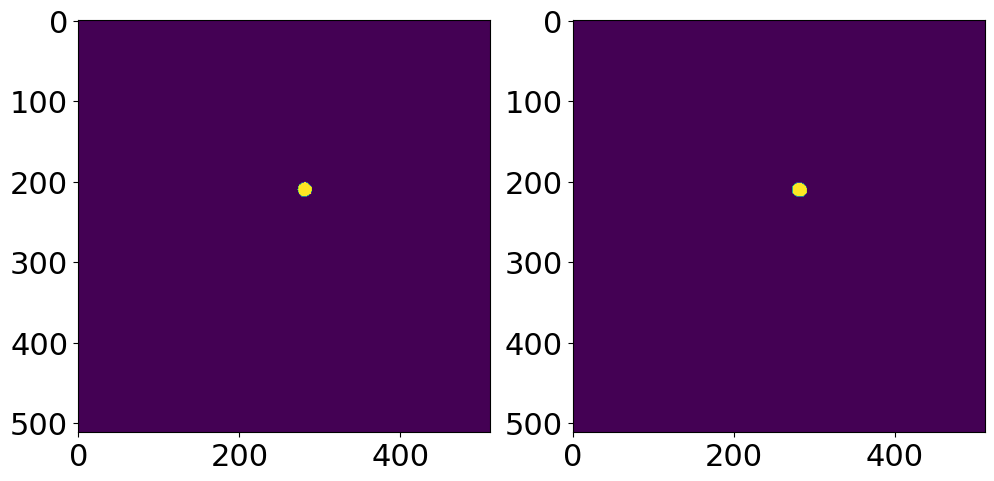

In [215]:
plt.subplot(1,2,1)
plt.imshow(bin_22[2])

plt.subplot(1,2,2)
plt.imshow(bin_limb[2])

In [171]:
calculate_dice_score_3d(np.array([bin_22[90]]), np.array([bin_limb[90]]))

IndexError: index 90 is out of bounds for axis 0 with size 51

In [217]:
calculate_dice_score_3d(bin_22, bin_limb)

0.9767831512698403

In [7]:

def calculate_ssim_3d(image1, image):
#     image1 = sitk.ReadImage(image1_path)
#     image2 = sitk.ReadImage(image2_path)

    # Calculate SSIM
    ssim_filter = sitk.SSIMImageFilter()
    ssim_value = ssim_filter.Execute(image1, image2)

    return ssim_value


In [12]:

def calculate_mutual_information(image1, image2):
    # Read the images
#     image1 = sitk.ReadImage(image1_path)
#     image2 = sitk.ReadImage(image2_path)

    # Instantiate the filter and execute
    mi_filter = sitk.MutualInformationImageFilter()
    mi_filter.Execute(image1, image2)

    # Get the Mutual Information value
    mutual_information = mi_filter.GetMutualInformation()

    return mutual_information


In [3]:
patient_path = '/mnt/iDriveShare/Kayla/CBCT_images/kayla_extracted/19/'
CT1_path = patient_path+'20180411_CT_09_APR_2018/'
CT2_path = patient_path+'20180515_CT_10_MAY_2018/'

In [5]:
CT1 = generate_sitk_image(CT1_path)
CT2 = generate_sitk_image(CT2_path)

In [13]:
calculate_mutual_information(CT1,CT1)

AttributeError: module 'SimpleITK' has no attribute 'MutualInformationImageFilter'

In [2]:
# https://github.com/kurnianggoro/GSOC2017/blob/master/data/lbfmodel.yaml
facemark = cv2.face.createFacemarkLBF()
facemark.loadModel('/mnt/iDriveShare/Kayla/lbfmodel.yaml')

# Initialize the face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
image = cv2.imread('/mnt/iDriveShare/Kayla/body1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




In [3]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
print(faces)

# If faces are found, detect landmarks
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    _, landmarks = facemark.fit(roi_gray)
    for landmark in landmarks:
        for x, y in landmark[0]:
            # Draw a circle on each landmark point
            cv2.circle(image, (x, y), 1, (0, 255, 0), -1)

# # Display the output
# cv2.imshow('Facial Landmark Detection', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

()
